
# <span style="color:rgb(213,80,0)">This file is referred to dataset Income2</span>

Creates all Figures and tables associated with dataset Income2 See Table A.2 in Appendix A to see where this dataset has been used inside the book

## Data loading

In [1]:
clear
close all
load Income2;
y=Income2{:,"Income"};
X=Income2{:,1:end-1};

% y and X in table format
yt=Income2(:,end);
Xt=Income2(:,1:end-1);
Xytable=Income2;

n=length(y);
one=ones(n,1);
% prin =
prin=0;

## Analysis of the score test

Table 1.3


In [2]:
la=[-2  -1.5 -1 -0.5 0 1];
out=Score(y,one, 'la',la);

In [3]:
disp([la' out.Score])

         -2.00          3.20
         -1.50         -1.07
         -1.00         -5.47
         -0.50        -10.12
             0        -15.17
1.00        -27.15

In [4]:

Score=out.Score;
rownam=["-2" "-1.5" "Inverse" "Reciprocal square root" "Logarithmic" "None"];
colnam=["lambda" "Score test"];

ScoreT=array2table([la' Score],"RowNames",rownam,"VariableNames",colnam);
format bank
disp('Table 1.3')

Table 1.3

In [5]:
disp(ScoreT)

                              lambda    Score test
                              ______    __________
    -2                        -2.00         3.20  
    -1.5                      -1.50        -1.07  
    Inverse                   -1.00        -5.47  
    Reciprocal square root    -0.50       -10.12  
    Logarithmic                0.00       -15.17  
    None                       1.00       -27.15

## Compute statistics in the original and transformed scale

Table 1.4 with lambda=1, lambda=-1 or lambda=-1.5


In [6]:
ysor=sort(y);

alpha=0.10;
m=floor((n-1)*alpha);
meanTri=mean(ysor(m+1:n-m));
mea=mean(y);
medi=median(y);
sta=std(y);
consfact=1/norminv(0.75);
madn=consfact*mad(y,1);

loc=[mea; meanTri; medi; sta; madn];
yori=y;

laj=-1;
y1=100000*(yori.^laj);

ysor=sort(y1);
alpha=0.10;
m=floor((n-1)*alpha);
meanTri1=mean(ysor(m+1:n-m));
mea1=mean(y1);
medi1=median(y1);
sta1=std(y1);
madn1=consfact*mad(y1,1);

loc1=[mea1; meanTri1; medi1; sta1; madn1];

laj=-1.5;
y1=10000000*(yori.^laj);
ysor=sort(y1);
meanTri1=mean(ysor(m+1:n-m));
mea1=mean(y1);
medi1=median(y1);
sta1=std(y1);
madn1=consfact*mad(y1,1);

loc2=[mea1; meanTri1; medi1; sta1; madn1];

LOC=[loc loc1 loc2];

rn=["Mean" "Trimmed mean" "Median" "Standard Deviation" "MADN"];
vn=["Original data" "Inverse transf" "la=-1.5"];
LOCt=array2table(LOC,'RowNames',rn,'VariableNames',vn);
format bank
disp(LOCt)

                          Original data    Inverse transf    la=-1.5
                          _____________    ______________    _______
    Mean                    18395.17            6.00          4.76  
    Trimmed mean            16883.81            6.10          4.80  
    Median                  16093.50            6.21          4.90  
    Standard Deviation       7247.04            1.55          1.72  
    MADN                     2771.72            1.17          1.42

## Create Figure 1.6 fanplot

Fanplot using just the intercept


In [7]:
outFSRfanUNI=FSRfan(y,one,'intercept',0,'la',[-2 -1.5 -1 -0.5],'tag','fanplotnoExpl');

Total estimated time to complete LMS:  0.14 seconds 
Attention: there was an exact fit. Robust estimate of s^2 is <1e-7
Total estimated time to complete LMS:  0.00 seconds 
Total estimated time to complete LMS:  0.00 seconds 
Total estimated time to complete LMS:  0.00 seconds


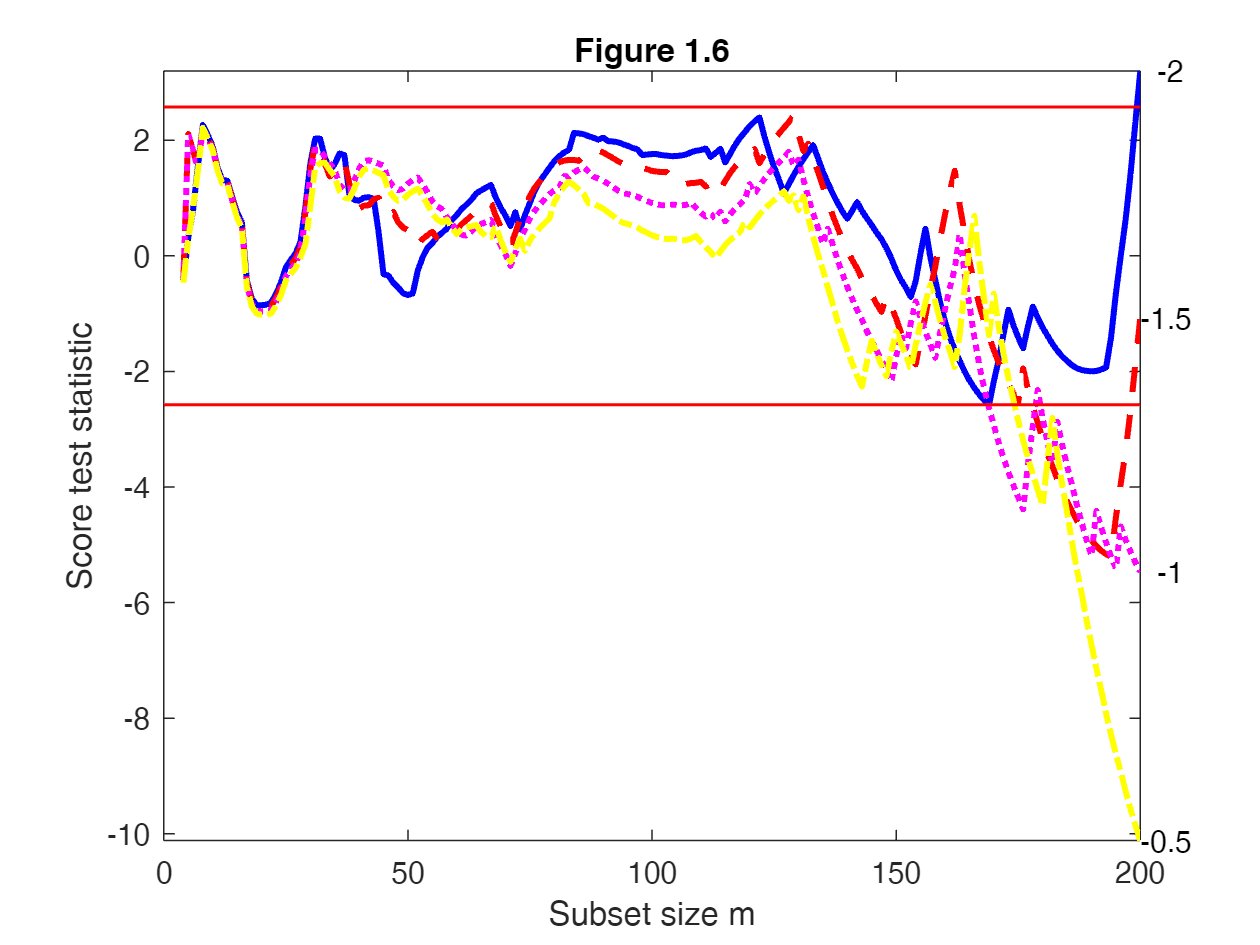

In [8]:
title('Figure 1.6')

In [9]:
if prin==1
    % print to postscript
    print -depsc fanIncome2.eps;
end

## Analysis of the trimmed mean (Prepare input for Figure

Exercise 1.4 - part (a)


In [10]:
alphaAll=(0:0.01:0.5)';
lalphaAll=length(alphaAll);
meanTru=zeros(lalphaAll,1);
% meanTru1=meanTru;
ysor=sort(y);
for i=1:lalphaAll
    m=floor((n-1)*alphaAll(i));
    meanTru(i)=mean(ysor(m+1:n-m));
    % meanTru1(i)=trimmean(y,100*alphaAll(i));

end

## Create figure A.1

Exercise 1.4 - part (b)



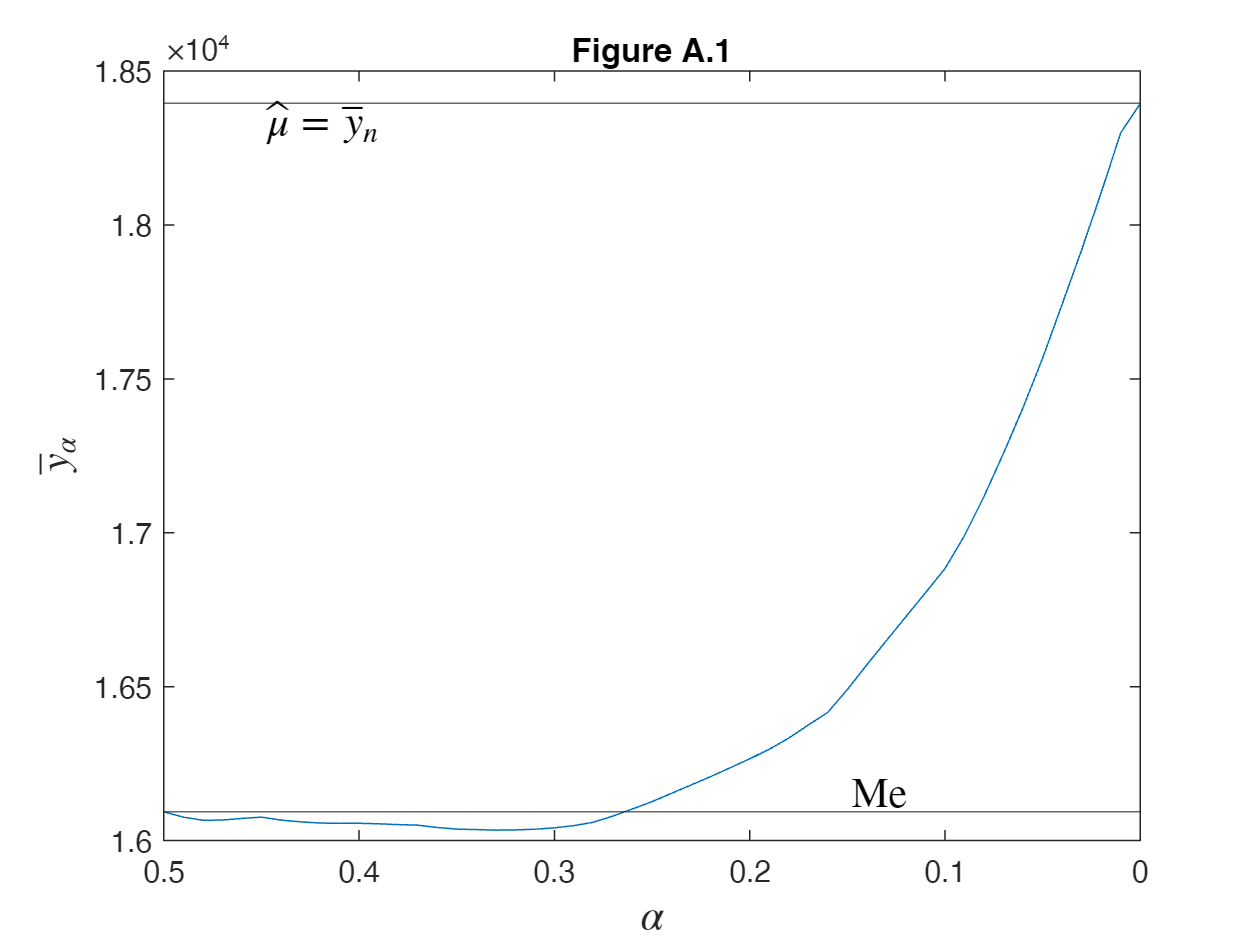

In [11]:
figure
FontSize=14;
plot(alphaAll,meanTru)
xlabel('\alpha','FontSize',FontSize)
xlim([0 0.5])
meany=mean(y);
mediany=median(y);
yline(meany)
yline(mediany)
ylabel(' $\overline y_\alpha$ ','Interpreter','latex','FontSize',FontSize)
text(0.45,meany-60," $\hat \mu = \overline y_n$ ",'Interpreter','latex','FontSize',FontSize)
text(0.15,mediany+60,"Me",'Interpreter','latex','FontSize',FontSize)

set(gca,"XDir","reverse")
set(gcf,"Name",'Figure A.1')
title('Figure A.1')

In [12]:
prin=0;
if prin==1
    % print to postscript
    print -depsc trimmeanIncome2.eps;
end

## Create figure A.2.

Exercise 1.4 - part (c)



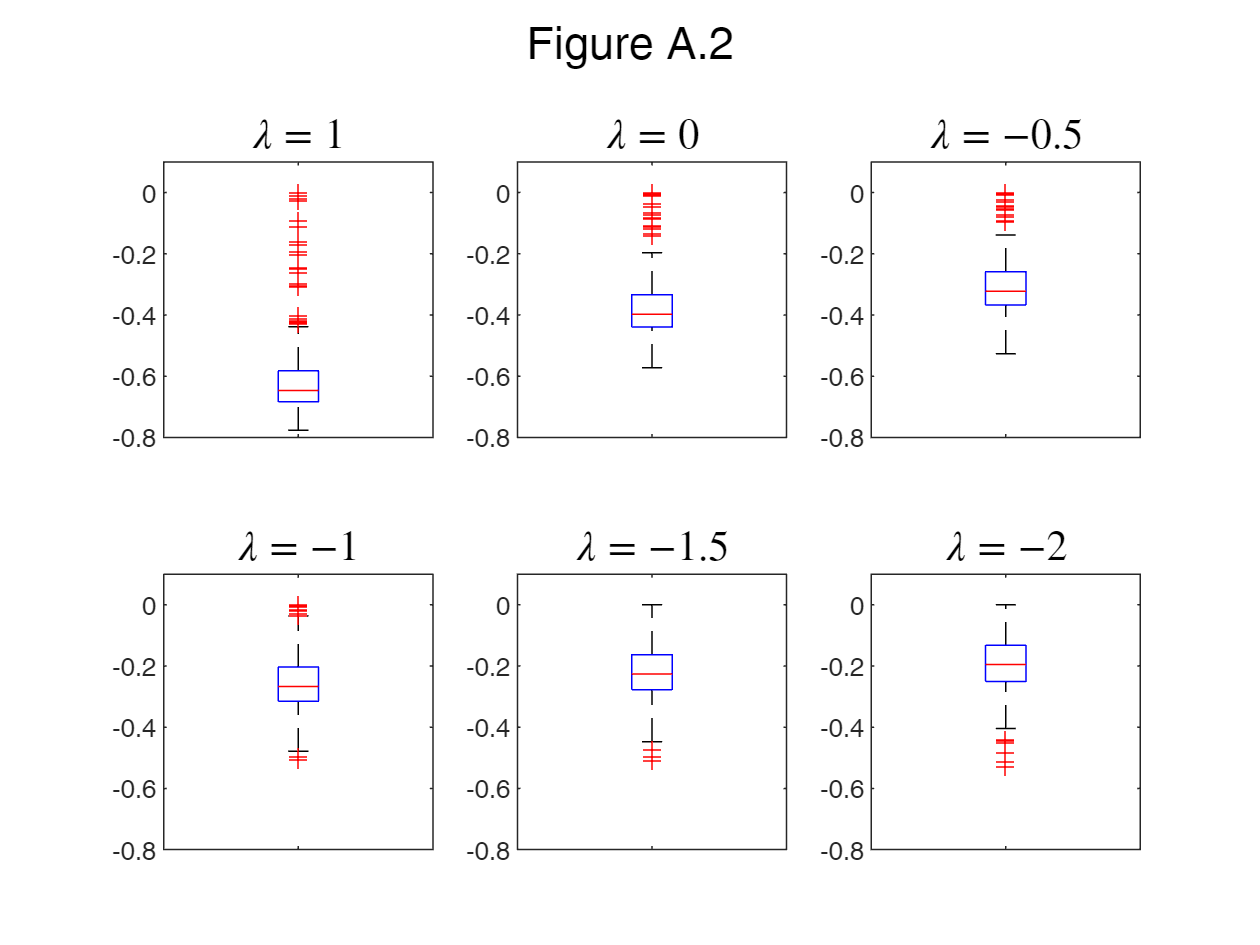

In [13]:
figure
yl1=-0.8;
yl2=0.1;
yrs=y/max(y);
subplot(2,3,1)
ytra=normBoxCox(yrs,1,1,'Jacobian',true);
boxplot(ytra,'Labels',{''})
title(' $\lambda=1$ ','Interpreter','latex','FontSize',FontSize)
ylim([yl1 yl2])

subplot(2,3,2)
ytra=normBoxCox(yrs,1,0,'Jacobian',true);
boxplot(ytra,'Labels',{''})
title(' $\lambda=0$ ','Interpreter','latex','FontSize',FontSize)
ylim([yl1 yl2])

subplot(2,3,3)
ytra=normBoxCox(yrs,1,-0.5,'Jacobian',true);
boxplot(ytra,'Labels',{''})
title(' $\lambda=-0.5$ ','Interpreter','latex','FontSize',FontSize)
ylim([yl1 yl2])

subplot(2,3,4)
ytra=normBoxCox(yrs,1,-1,'Jacobian',true);
boxplot(ytra,'Labels',{''})
title(' $\lambda=-1$ ','Interpreter','latex','FontSize',FontSize)
ylim([yl1 yl2])

subplot(2,3,5)
ytra=normBoxCox(yrs,1,-1.5,'Jacobian',true);
boxplot(ytra,'Labels',{''})
title(' $\lambda=-1.5$ ','Interpreter','latex','FontSize',FontSize)
ylim([yl1 yl2])

subplot(2,3,6)
ytra=normBoxCox(yrs,1,-2,'Jacobian',true);
boxplot(ytra,'Labels',{''})
title(' $\lambda=-2$ ','Interpreter','latex','FontSize',FontSize)
ylim([yl1 yl2])
sgtitle('Figure A.2')
set(gcf,"Name",'Figure A.2')

In [14]:

prin=0;
if prin==1
    % print to postscript
    print -depsc boxlaIncome2.eps;
end

%  BEGIN OF REGRESSION ANALYSIS (CHAPTER 10)

## Figure 10.12 yXplot


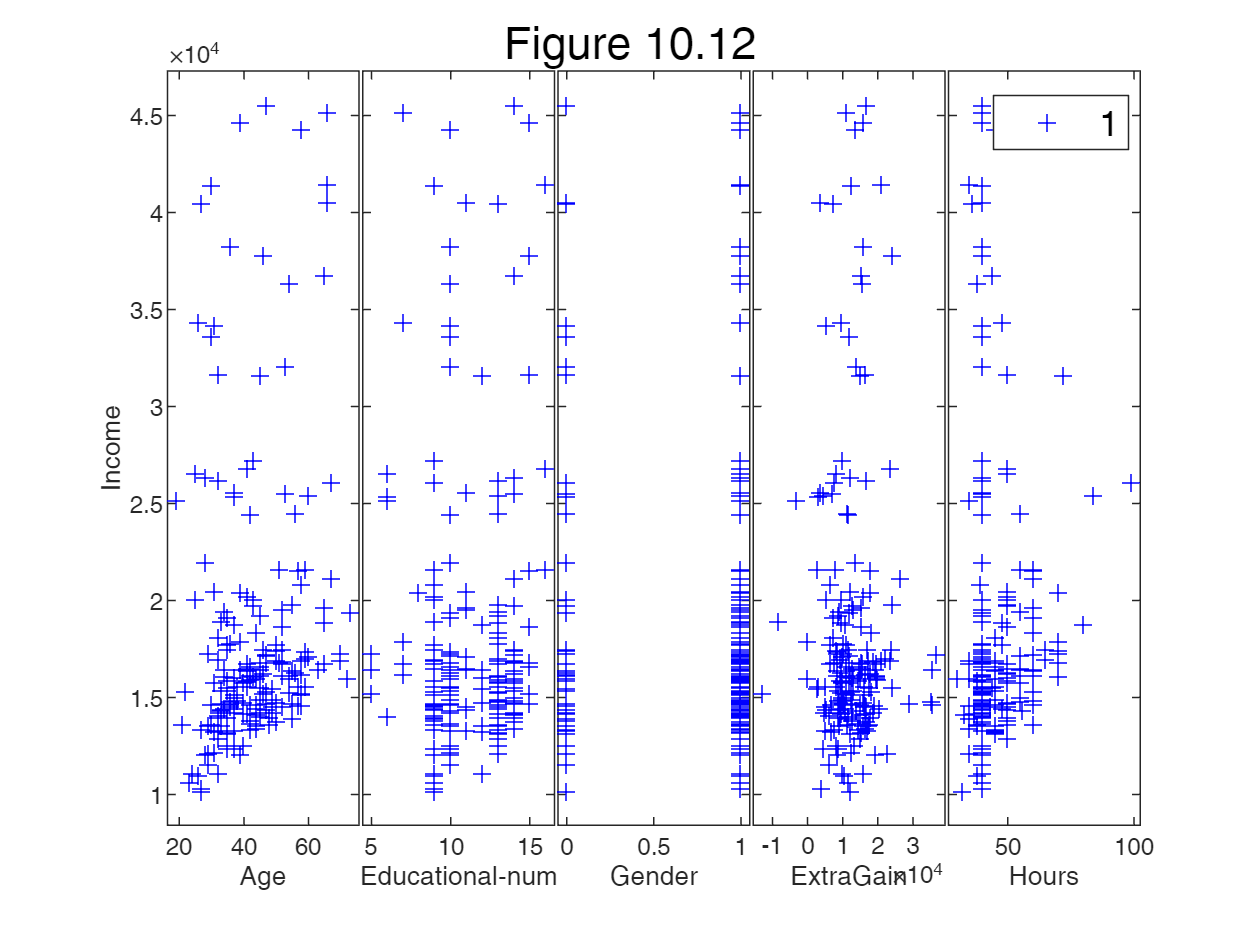

In [15]:
yXplot(yt,Xt);
sgtitle("Figure 10.12")

In [16]:
if prin==1
    % print to postscript
    print -depsc inc2f1.eps;
end

## Fit in the original scale using all the observations

In [17]:
disp("Table 10.2")

Table 10.2

In [18]:
mdl=fitlm(X,y);
disp(mdl)

Linear regression model:
    y ~ 1 + x1 + x2 + x3 + x4 + x5
Estimated Coefficients:
                   Estimate      SE       tStat    pValue
                   ________    _______    _____    ______
    (Intercept)    12327.39    3825.61     3.22     0.00 
    x1               111.34      44.67     2.49     0.01 
    x2               112.29     224.55     0.50     0.62 
    x3             -1454.15    1228.92    -1.18     0.24 
    x4                -0.02       0.08    -0.29     0.77 
    x5                31.44      51.42     0.61     0.54 
Number of observations: 200, Error degrees of freedom: 194
Root Mean Squared Error: 7.19e+03
R-squared: 0.0414,  Adjusted R-Squared: 0.0167
F-statistic vs. constant model: 1.67, p-value = 0.142

## Variable selectoin in the orginal scale

Standard automatic variable selection


In [19]:
disp('Variable selection in the original scale')

Variable selection in the original scale

In [20]:
stepwiselm(Xytable)

1. Adding Age, FStat = 6.449, pValue = 0.01187
ans = 
Linear regression model:
    Income ~ 1 + Age
Estimated Coefficients:
                   Estimate      SE       tStat    pValue
                   ________    _______    _____    ______
    (Intercept)    13550.55    1973.57    6.87      0.00 
    Age              112.50      44.30    2.54      0.01 
Number of observations: 200, Error degrees of freedom: 198
Root Mean Squared Error: 7.15e+03
R-squared: 0.0315,  Adjusted R-Squared: 0.0267
F-statistic vs. constant model: 6.45, p-value = 0.0119

## Create Figure 10.13

Analysis using a set of values of lambda


In [21]:
outFSRfan=FSRfan(y,X,'plots',1,'la',[-2 -1 -0.5 0 0.5 1],'nsamp',10000);

Total estimated time to complete LMS:  0.08 seconds 
Attention: there was an exact fit. Robust estimate of s^2 is <1e-7
------------------------------
Total estimated time to complete LMS:  0.07 seconds 
------------------------------
Total estimated time to complete LMS:  0.07 seconds 
------------------------------
Total estimated time to complete LMS:  0.07 seconds 
------------------------------
Total estimated time to complete LMS:  0.07 seconds 
------------------------------
Total estimated time to complete LMS:  0.07 seconds 
------------------------------


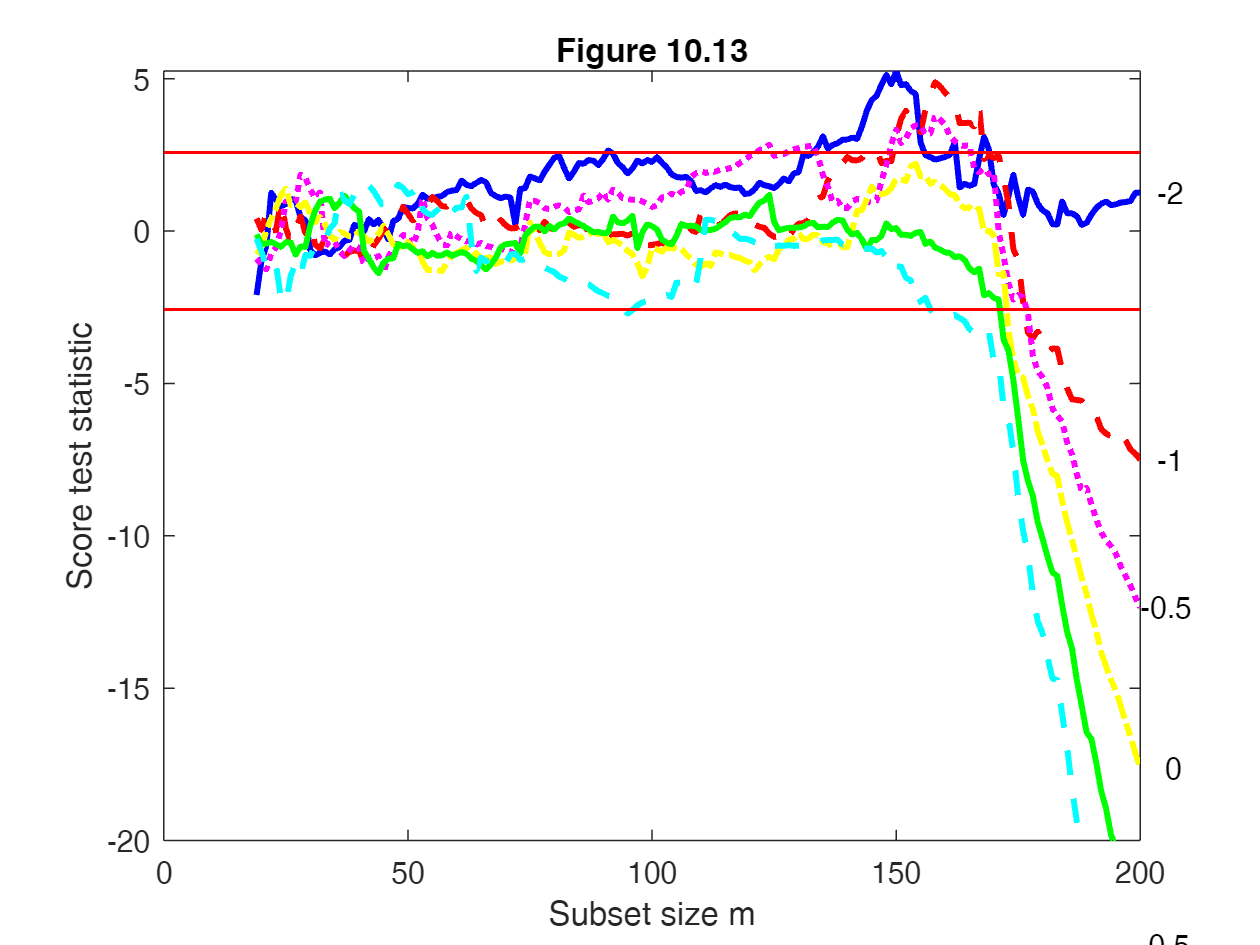

In [22]:
title('Figure 10.13')

In [23]:
if prin==1
    % print to postscript
    print -depsc inc2f2.eps;
end

## Create Figure 10.14

In [24]:
[out]=fanBIC(outFSRfan);
disp('Best value of transformation parameter according to robust BIC')

Best value of transformation parameter according to robust BIC

In [25]:
disp(out.labest)

1.00


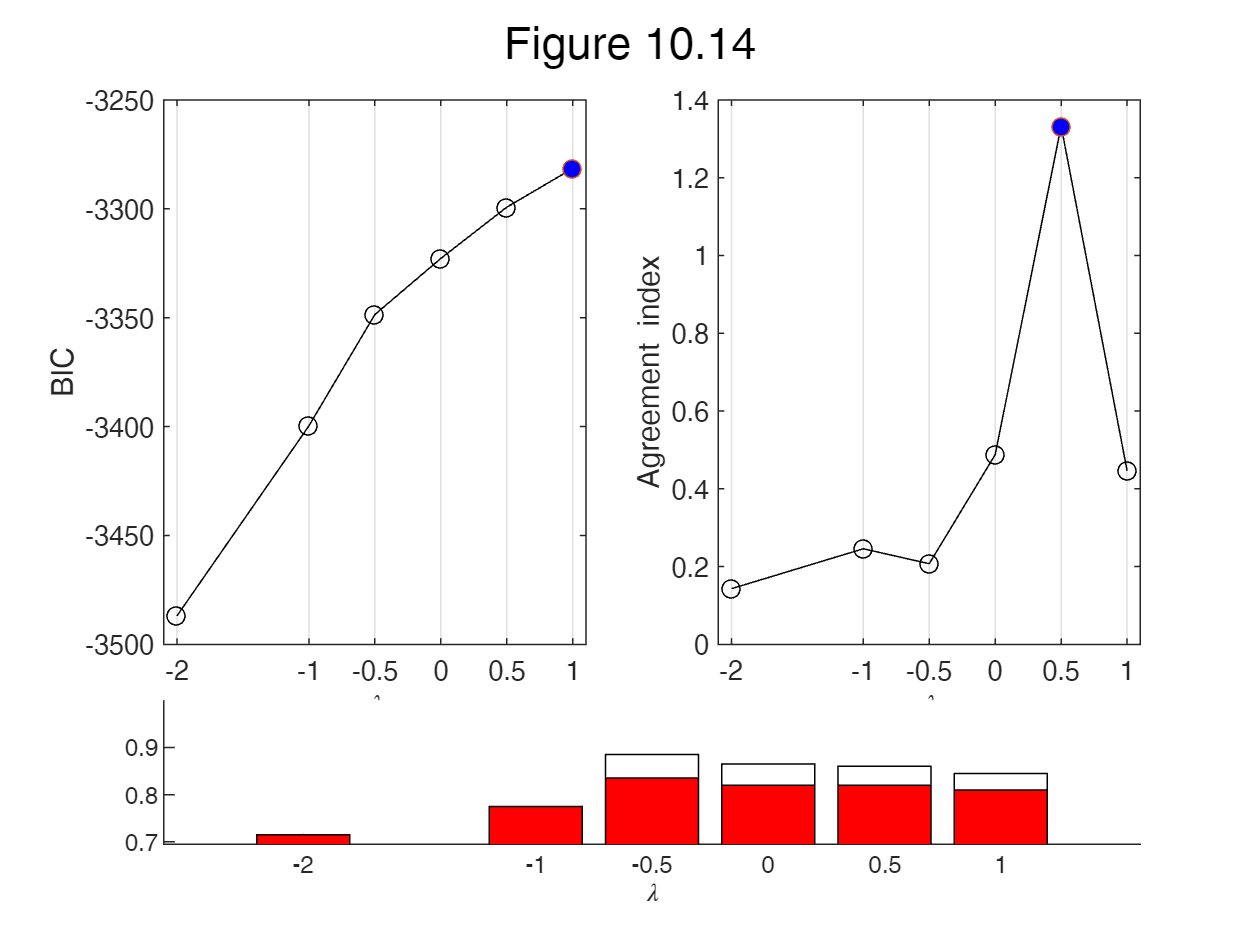

In [26]:
sgtitle('Figure 10.14')
set(gcf,'Name','Figure 10.14')

In [27]:
if prin==1
    % print to postscript
    print -depsc inc2f3.eps;
end

% %%  Analysis using a finer grid of values of lambda
% % not given in the book
% outFSRfan=FSRfan(y,X,'la',[0 0.25  0.5 0.75 1],'plots',1);
% [out]=fanBIC(outFSRfan);

## Transformed SQRT scale

In [28]:
ytra=y.^0.5;

## Create Figure 10.15

FSR in the trasformed scale


------------------------------
Observed curve of r_min is at least 10 times greater than 99.99% envelope
--------------------------------------------------
-------------------------
Signal detection loop
Tentative signal in central part of the search: step m=154 because
rmin(154,200)>99.999%
-------------------
Signal validation exceedance of upper envelopes
Validated signal


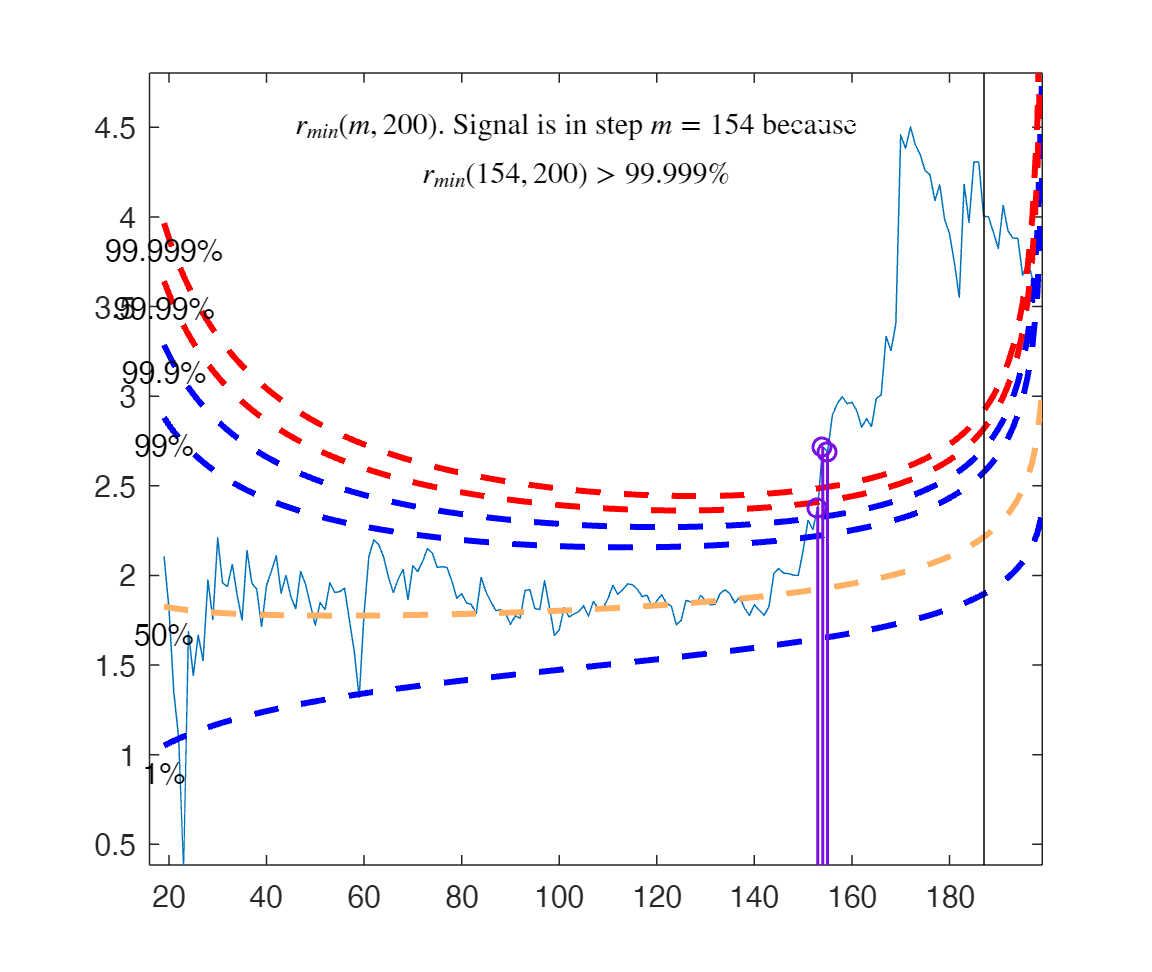

-------------------------------
Start resuperimposing envelopes from step m=153
Superimposition stopped because r_{min}(156,165)>99.9% envelope
Subsample of 164 units is homogeneous
----------------------------
Final output
Number of units declared as outliers=36
Summary of the exceedances
1.00         99.00        999.00       9999.00      99999.00
          2.00         48.00         45.00         43.00         43.00

In [29]:
outf=FSR(ytra,X,'plots',1);


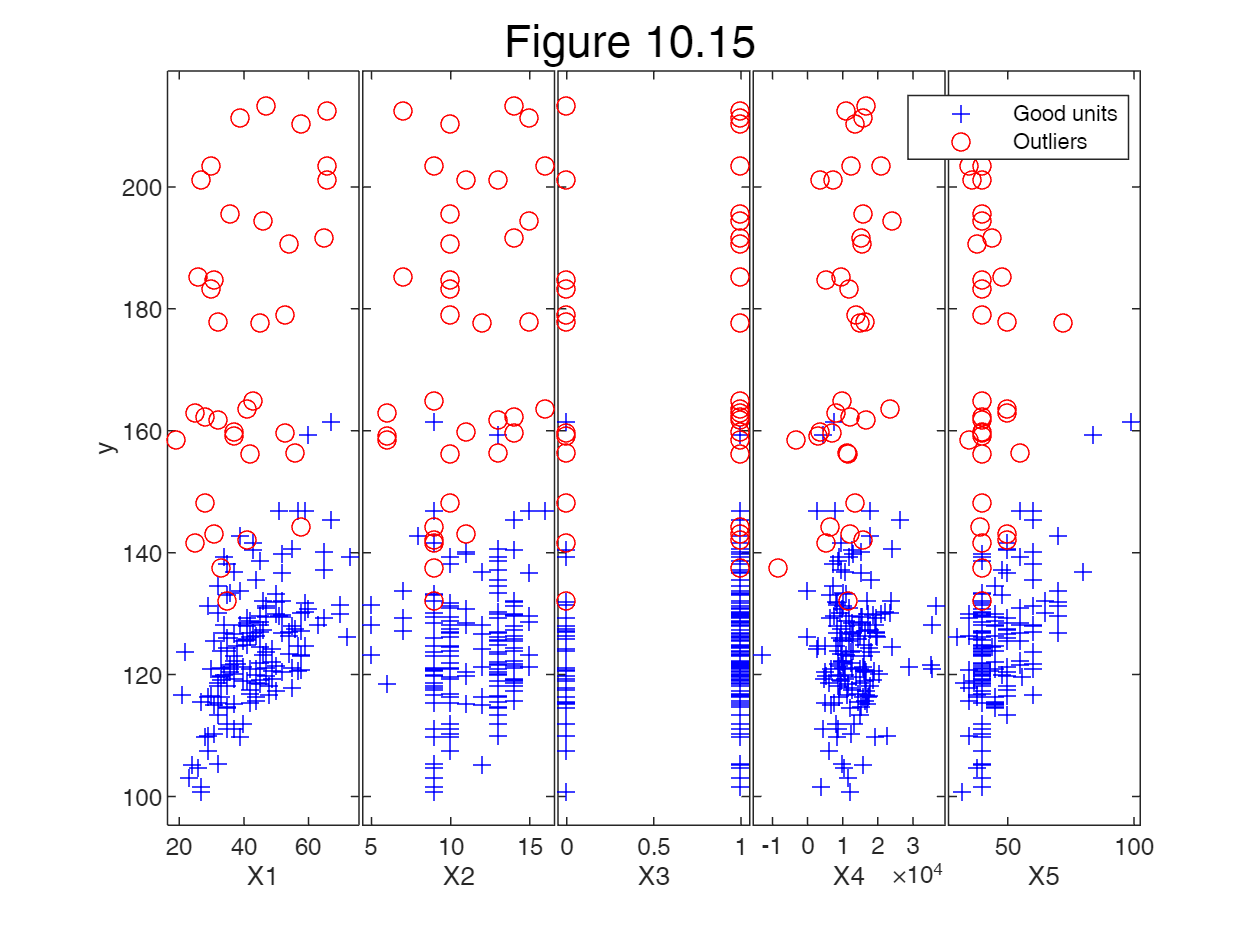

In [30]:
 fsr_yXplot=findobj(0, 'type', 'figure','tag','fsr_yXplot');
figure(fsr_yXplot(end))
sgtitle('Figure 10.15')
set(gcf,'Name','Figure 10.15')

% group=one;
% group(outf.outliers)=2;
% yXplot(ytra,X,'group',group)
sgtitle('Figure 10.15')

In [31]:
if prin==1
    % print to postscript
    print -depsc inc2f4.eps;
end

## Prepare the input for Figure 10.16

FS monitoring of residuals in the transformed scale Use LTS as a starting point


In [32]:
outLXS=LXS(ytra,X,'nsamp',50000,'lms',0,'conflev',0.975);

Total estimated time to complete LTS:  0.35 seconds 
------------------------------

In [33]:
outFS=FSReda(ytra,X,outLXS.bs);

## Create Figure 10.17


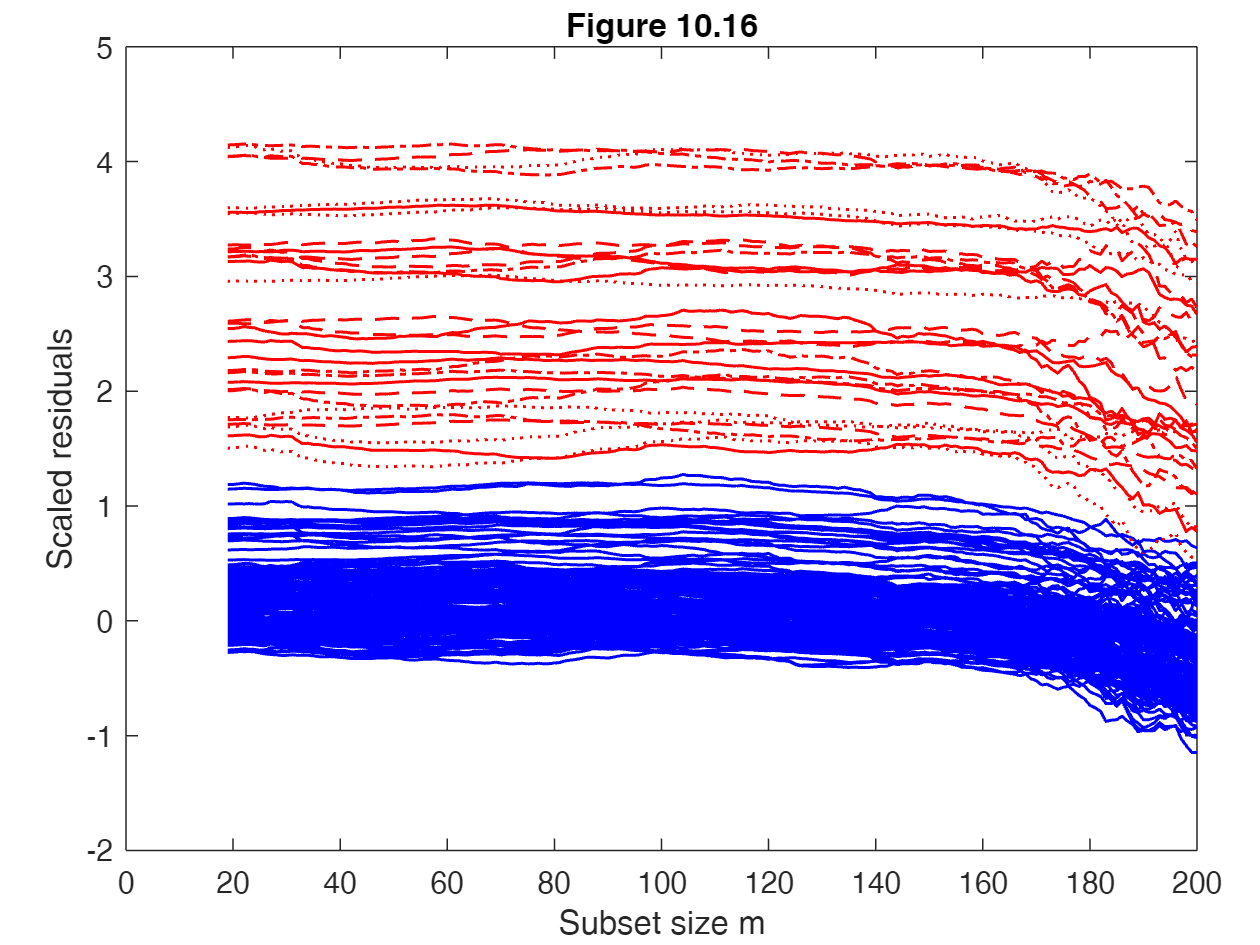

In [34]:
fground=struct;
fground.fthresh=[-3 1.5];
fground.Color={'r'};
fground.flabstep='';
bground='';

resfwdplot(outFS,'datatooltip','','fground',fground, ...
    'bground',bground)
title('Figure 10.16')
set(gcf,'Name','Figure 10.16')

In [35]:

if prin==1
    % print to postscript
    print -depsc inc2f5.eps;
end

## Create Figure 10.17

In [36]:
disp('ANOVA in the transformed scale using all obs')

ANOVA in the transformed scale using all obs

In [37]:
mdlyatrallobs=fitlm(X,ytra);
disp(mdlyatrallobs)

Linear regression model:
    y ~ 1 + x1 + x2 + x3 + x4 + x5
Estimated Coefficients:
                   Estimate     SE      tStat    pValue
                   ________    _____    _____    ______
    (Intercept)     108.42     12.26     8.84     0.00 
    x1                0.40      0.14     2.83     0.01 
    x2                0.38      0.72     0.52     0.60 
    x3               -4.54      3.94    -1.15     0.25 
    x4               -0.00      0.00    -0.40     0.69 
    x5                0.18      0.16     1.11     0.27 
Number of observations: 200, Error degrees of freedom: 194
Root Mean Squared Error: 23
R-squared: 0.053,  Adjusted R-Squared: 0.0286
F-statistic vs. constant model: 2.17, p-value = 0.0588


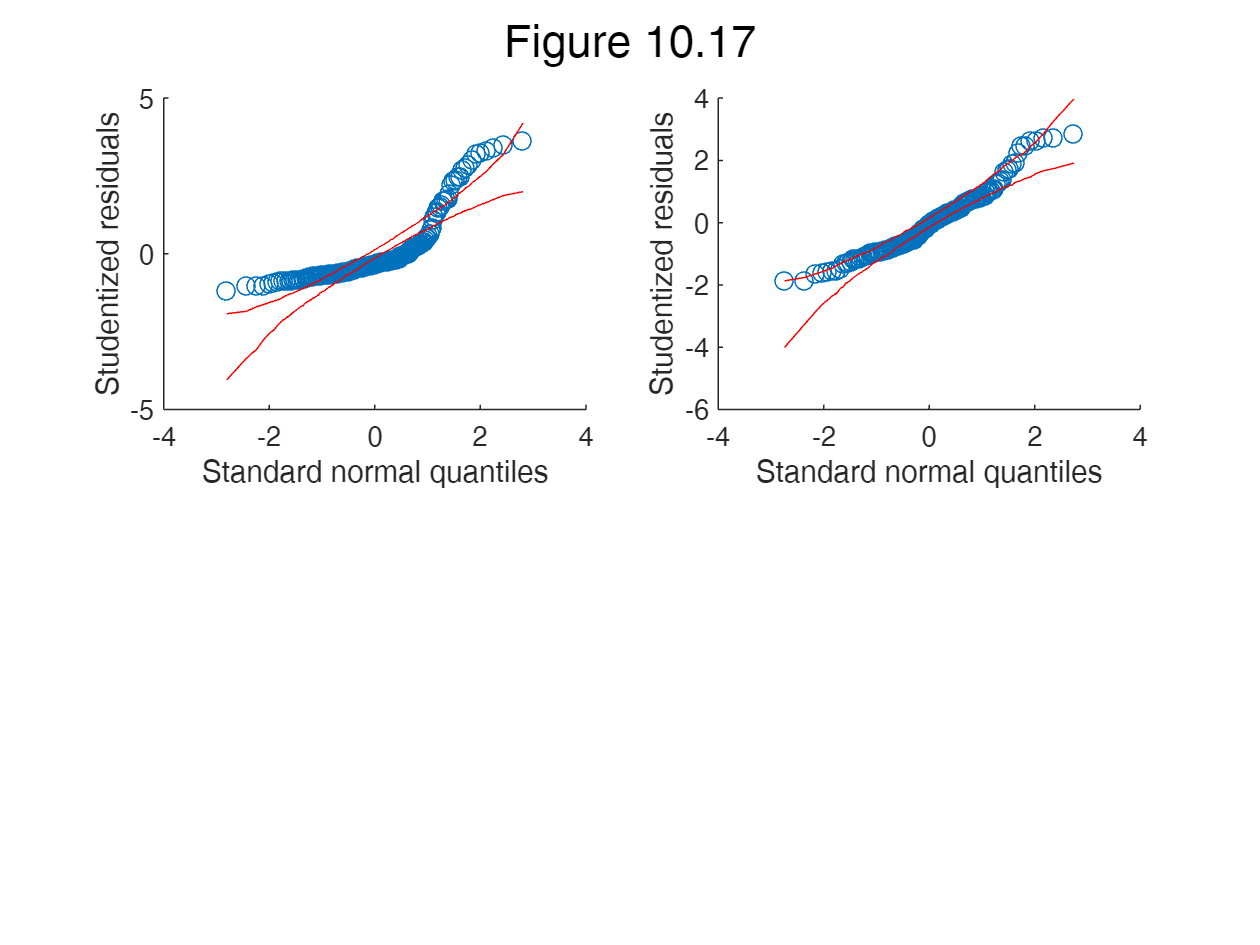

In [38]:

figure
conflev=0.99;
nr=2;
nc=2;
h1=subplot(nr,nc,1);
res=mdlyatrallobs.Residuals{:,3};
qqplotFS(res,'X',X,'plots',1,'h',h1,'conflev',conflev);
% title('qqplot of stud. res.')
title('')

% Plot residuals excluding outl
mdl=fitlm(X,ytra,'Exclude',outf.outliers);
h2=subplot(nr,nc,2);
good=setdiff(1:n,outf.outliers);
Xg=X(good,:);
yg=ytra(good);
resg=mdl.Residuals{good,3};
qqplotFS(resg,'X',Xg,'plots',1,'h',h2,'conflev',conflev);

sgtitle('Figure 10.17')
set(gcf,'Name','Figure 10.17')

In [39]:

if prin==1
    % print to postscript
    print -depsc inc2f6.eps;
end

## FSRaddt in the original scale

Not given in the book outFSRaddt=FSRaddt(y,X); fanplot(outFSRaddt)

## FSRaddt in the transformed scale (with and without the outliers)

FSRaddt using all the observations


In [40]:
outFSRaddt1=FSRaddt(ytra,X);

Total estimated time to complete LMS:  0.02 seconds 
------------------------------
Total estimated time to complete LMS:  0.01 seconds 
------------------------------
Total estimated time to complete LMS:  0.01 seconds 
Total estimated time to complete LMS:  0.01 seconds 
------------------------------
Total estimated time to complete LMS:  0.02 seconds 
------------------------------

In [41]:
nr=2;
nc=1;
fanplot(outFSRaddt1,'tag','fanplotytraallobs')

ans =
     []


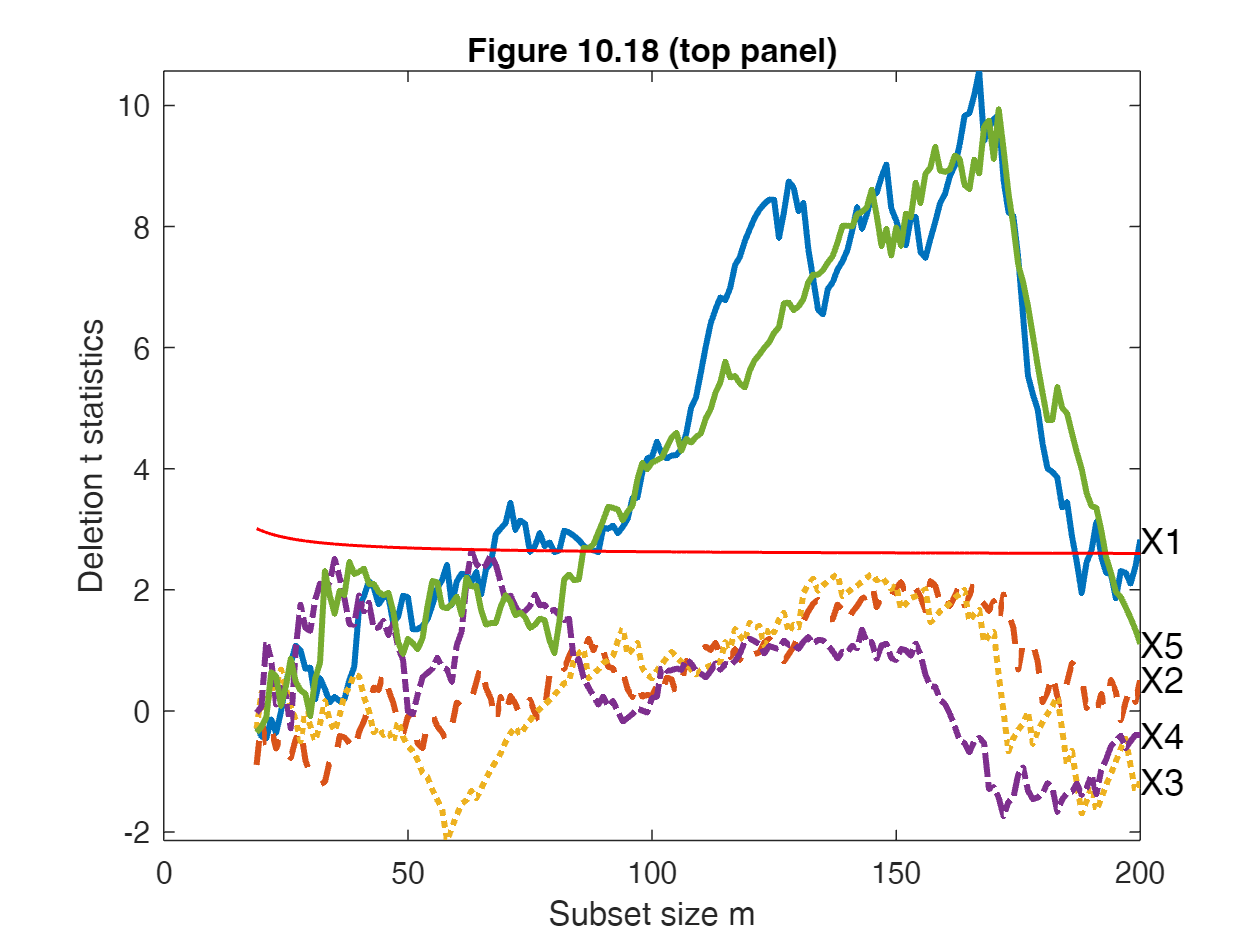

In [42]:
title('Figure 10.18 (top panel)')
set(gcf,'Name','Figure 10.18')

In [43]:

if prin==1
    % print to postscript
    print -depsc inc2f7top.eps;
end

% FSRaddt with outliers removed
outFSRaddt1=FSRaddt(yg,Xg);

Total estimated time to complete LMS:  0.03 seconds 
------------------------------
Total estimated time to complete LMS:  0.01 seconds 
------------------------------
Total estimated time to complete LMS:  0.01 seconds 
Total estimated time to complete LMS:  0.02 seconds 
------------------------------
Total estimated time to complete LMS:  0.06 seconds 
------------------------------

In [44]:
fanplot(outFSRaddt1,'tag','fanplotytwithoutoutl')

ans =
     []


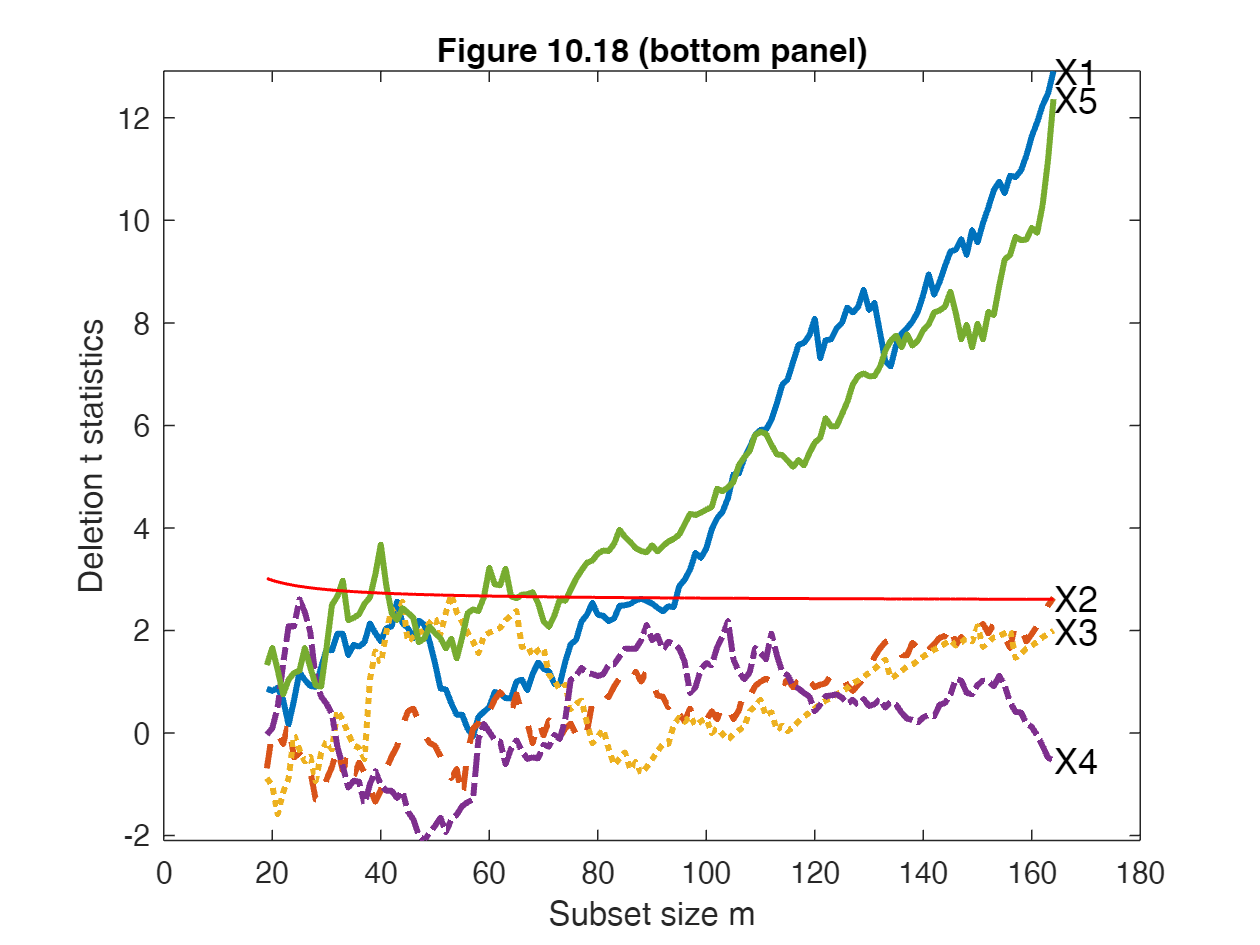

In [45]:
title('Figure 10.18 (bottom panel)')

In [46]:

if prin==1
    % print to postscript
    print -depsc inc2f7bot.eps;
end

## Create Table 10.3

In [47]:
disp("Table 10.3")

Table 10.3

In [48]:
disp('ANOVA in the transformed scale using all obs')

ANOVA in the transformed scale using all obs

In [49]:
mdlyOutRemoved=fitlm(X,ytra,'Exclude',outf.outliers);
disp(mdlyOutRemoved)

Linear regression model:
    y ~ 1 + x1 + x2 + x3 + x4 + x5
Estimated Coefficients:
                   Estimate     SE     tStat    pValue
                   ________    ____    _____    ______
    (Intercept)     69.46      3.63    19.14     0.00 
    x1               0.53      0.04    12.91     0.00 
    x2               0.53      0.20     2.64     0.01 
    x3               2.27      1.14     2.00     0.05 
    x4              -0.00      0.00    -0.53     0.60 
    x5               0.53      0.04    12.37     0.00 
Number of observations: 164, Error degrees of freedom: 158
Root Mean Squared Error: 5.72
R-squared: 0.669,  Adjusted R-Squared: 0.659
F-statistic vs. constant model: 63.9, p-value = 3.47e-36

## LXS

In [50]:
disp("Given that there is a slight instability of the results with LTS")

Given that there is a slight instability of the results with LTS

In [51]:
disp("We take a very large number of susbets ")

We take a very large number of susbets

In [52]:
outLXS=LXS(ytra,X,'nsamp',100000,'lms',1,'conflev',1-0.01/n);

Total estimated time to complete LMS:  0.66 seconds 
------------------------------

In [53]:
nout=length(outLXS.outliers);
disp(['Using conflev 0.99 number of units declared as outliers=' num2str(nout)])

Using conflev 0.99 number of units declared as outliers=30


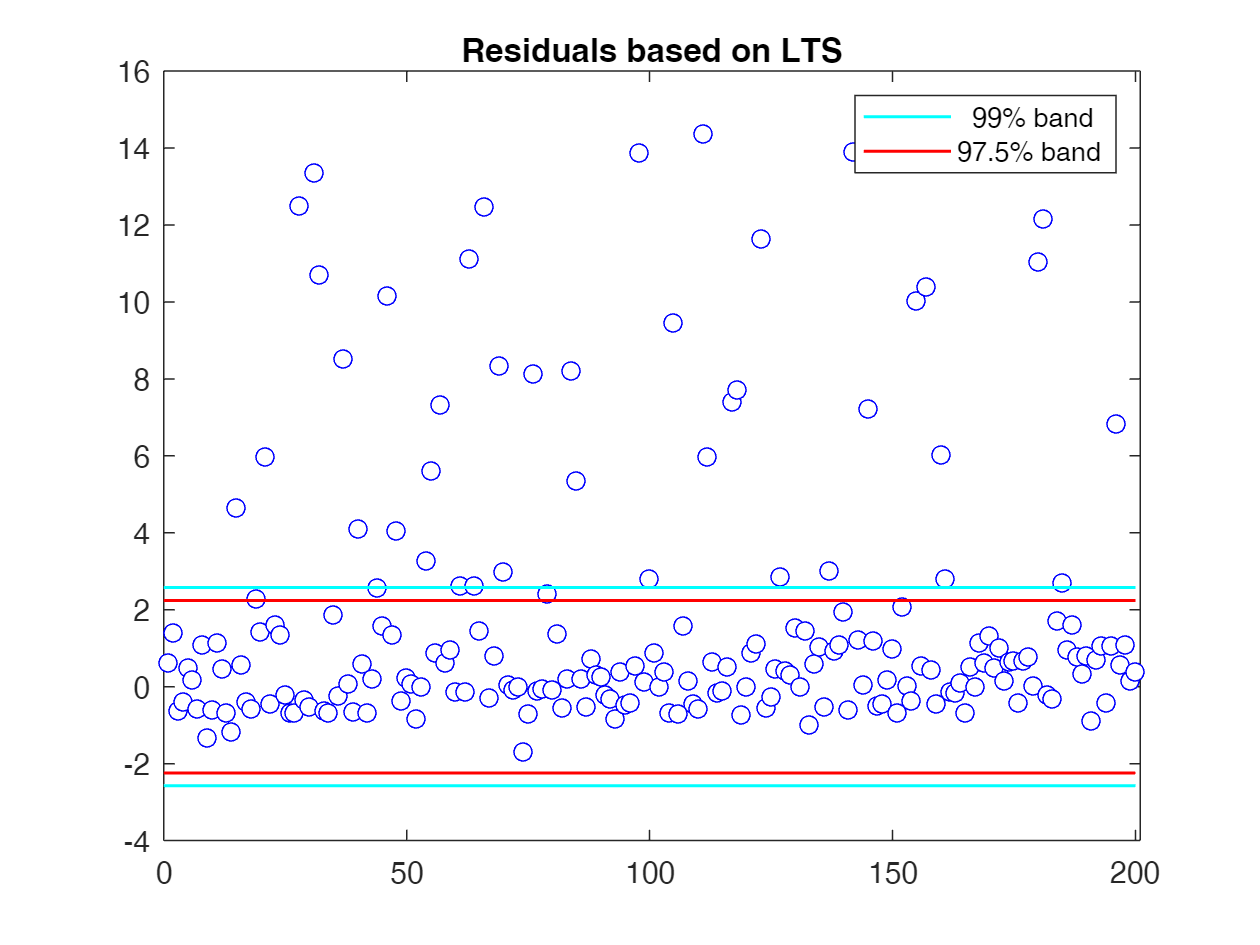

In [54]:
resindexplot(outLXS,'conflev',[0.975 0.99],'numlab','')
title('Residuals based on LTS')

In [55]:
if prin==1
    % print to postscript
    print -depsc inc2f7bot.eps;
end

## Variable selection in the transformed scale

The outliers have been excluded


In [56]:
disp('Variable selection in the transformed scale (upper model is linear)')

Variable selection in the transformed scale (upper model is linear)

In [57]:
Xytabltra=Xytable;
Xytabltra(:,end)=sqrt(Xytabltra(:,end));
stepwiselm(Xytabltra,'upper','linear','Exclude',outf.outliers)

1. Adding Hours, FStat = 73.2491, pValue = 8.3396e-15
2. Adding Age, FStat = 151.8557, pValue = 5.324889e-25
3. Adding Educational-num, FStat = 6.8833, pValue = 0.0095423
4. Adding Gender, FStat = 3.9251, pValue = 0.049295
ans = 
Linear regression model:
    Income ~ 1 + Age + Educational-num + Gender + Hours
Estimated Coefficients:
                       Estimate     SE     tStat    pValue
                       ________    ____    _____    ______
    (Intercept)         69.35      3.62    19.18     0.00 
    Age                  0.53      0.04    12.93     0.00 
    Educational-num      0.50      0.19     2.60     0.01 
    Gender               2.24      1.13     1.98     0.05 
    Hours                0.53      0.04    12.40     0.00 
Number of observations: 164, Error degrees of freedom: 159
Root Mean Squared Error: 5.7
R-squared: 0.668,  Adjusted R-Squared: 0.66
F-statistic vs. constant model: 80.1, p-value = 4.17e-37

In [58]:

disp('Variable selection in the transformed scale (upper model is quadratic)')

Variable selection in the transformed scale (upper model is quadratic)

In [59]:
Xytabltra=Xytable;
Xytabltra(:,end)=sqrt(Xytabltra(:,end));
stepwiselm(Xytabltra,'upper','quadratic','Exclude',outf.outliers)

1. Adding Hours, FStat = 73.2491, pValue = 8.3396e-15
2. Adding Age, FStat = 151.8557, pValue = 5.324889e-25
3. Adding Educational-num, FStat = 6.8833, pValue = 0.0095423
4. Adding Educational-num:Hours, FStat = 4.2147, pValue = 0.041714
5. Adding Gender, FStat = 4.6535, pValue = 0.032501
ans = 
Linear regression model:
    Income ~ 1 + Age + Gender + Educational-num*Hours
Estimated Coefficients:
                             Estimate     SE      tStat    pValue
                             ________    _____    _____    ______
    (Intercept)               47.89      10.29     4.65     0.00 
    Age                        0.54       0.04    13.27     0.00 
    Educational-num            2.38       0.87     2.75     0.01 
    Gender                     2.42       1.12     2.16     0.03 
    Hours                      0.99       0.21     4.72     0.00 
    Educational-num:Hours     -0.04       0.02    -2.22     0.03 
Number of observations: 164, Error degrees of freedom: 158
Root Mean Squ

## Non parametric analysis: create Figure 10.19


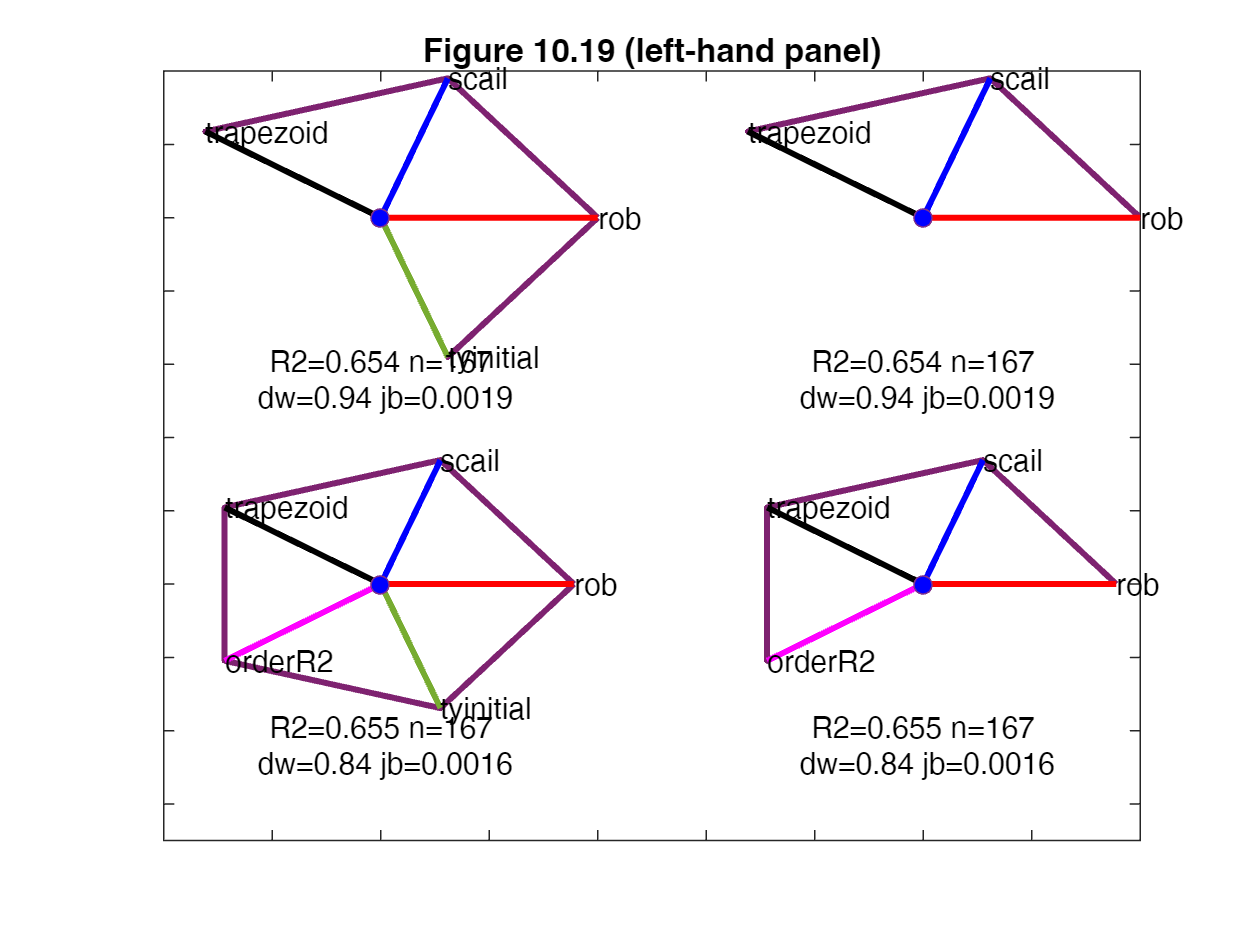

In [60]:
critBestSol=struct;
critBestSol.pvalDW=0.01;
critBestSol.pvalJB=0.001;

outAVAS=avasms(y,X,'critBestSol',critBestSol);
pl_aug=findobj(0, 'type', 'figure','tag','pl_augstar');
figure(pl_aug(end))
title('Figure 10.19 (left-hand panel)')
set(gcf,"Name",'Figure 10.19 (left-hand panel)')


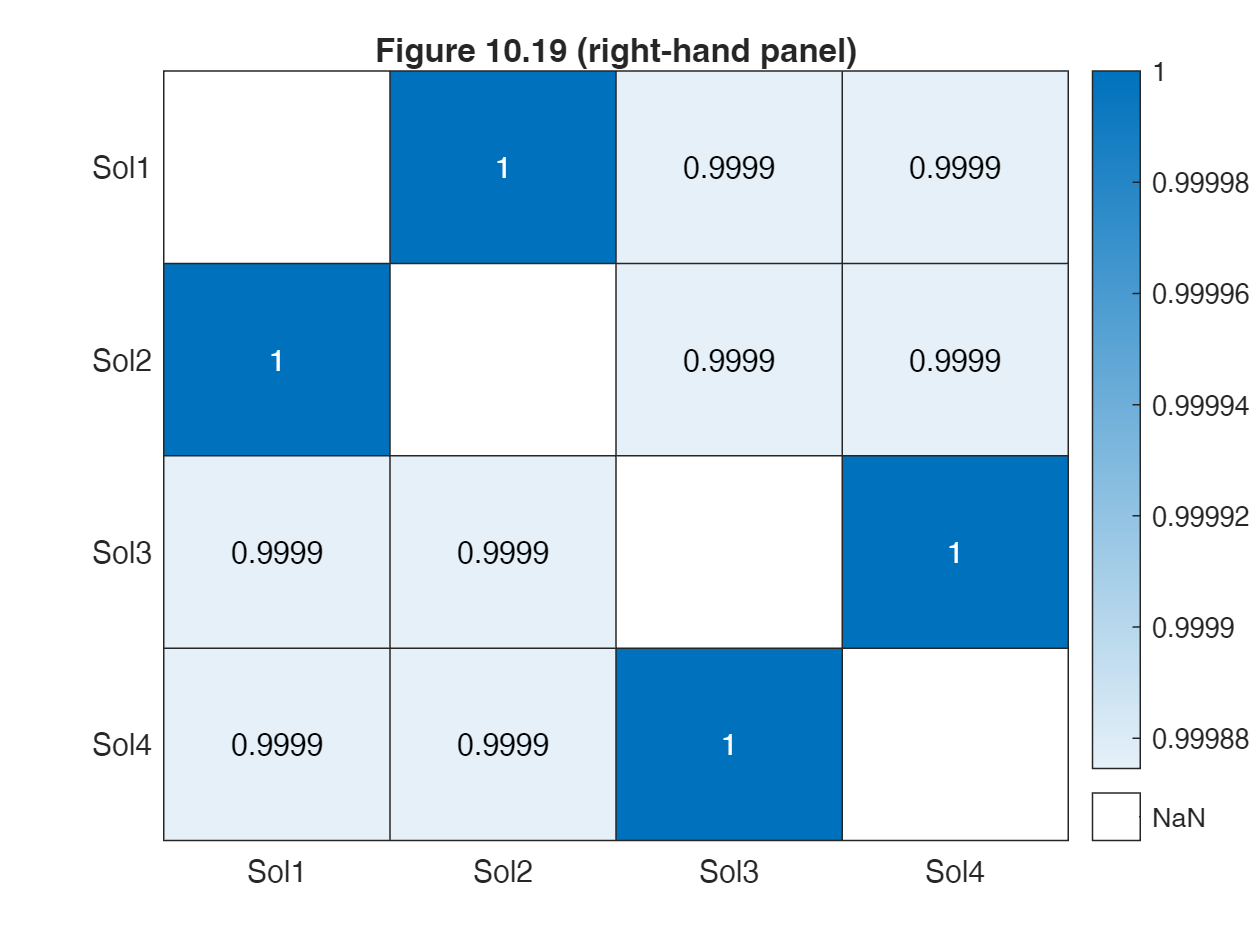

In [61]:

pl_heat=findobj(0, 'type', 'figure','tag','pl_heatmap');
figure(pl_heat(end))
title('Figure 10.19 (right-hand panel)')
set(gcf,"Name",'Figure 10.19 (right-hand panel)')

In [62]:

% avasmsplot(outAVAS)
if prin==1
    % print to postscript
    print -depsc inc2f8ASP.eps;
    print -depsc inc2f8HM.eps;

end

## Create Figures 10.20 and 10.21

Best solution aceplot



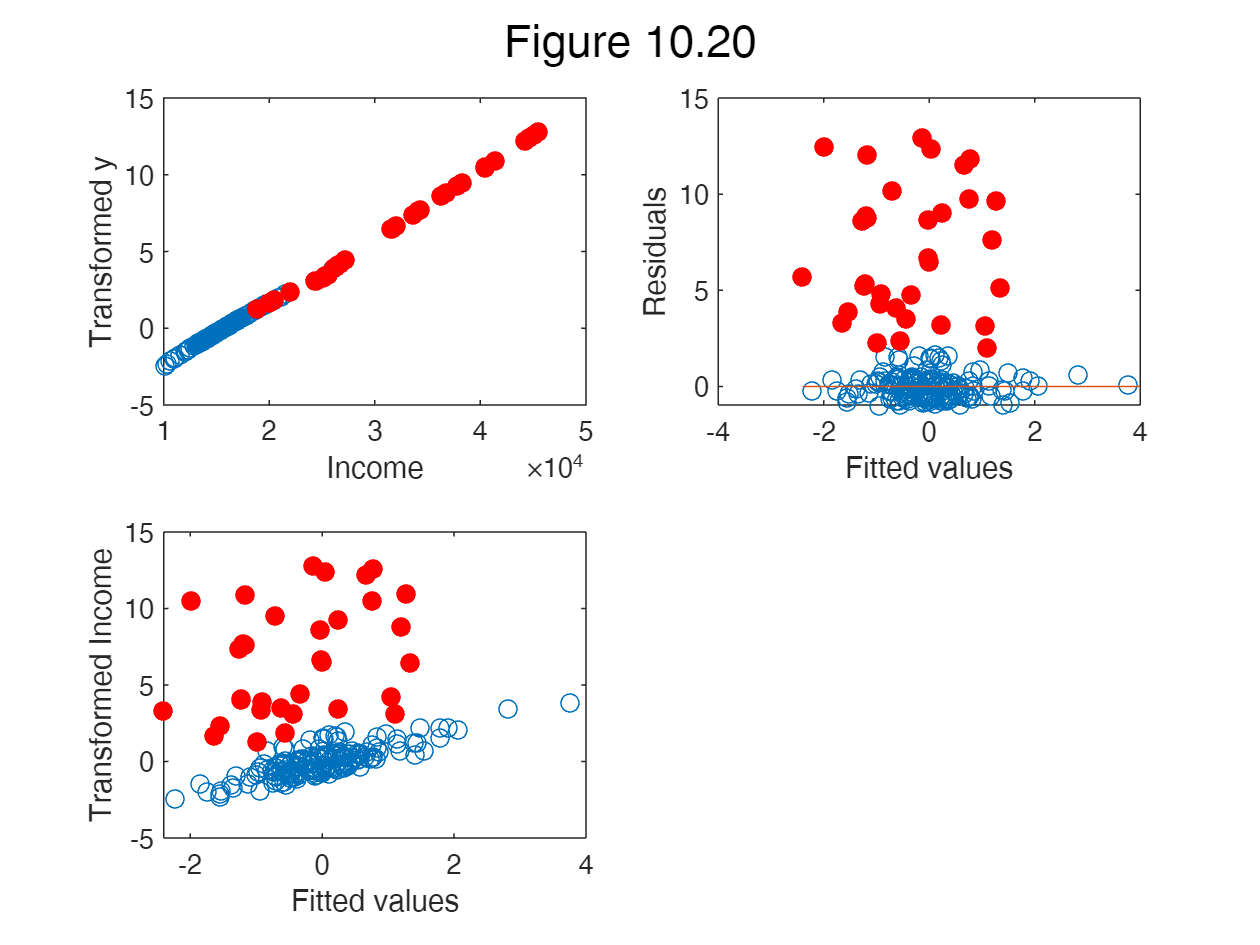

In [63]:
nameXy=Xytable.Properties.VariableNames;
j=1;
outj=outAVAS{j,"Out"};
outrobAV=outj{:};
aceplot(outrobAV,'VarNames',nameXy,'notitle',true)

pl_ty=findobj(0, 'type', 'figure','tag','pl_ty');
figure(pl_ty(end))
sgtitle('Figure 10.20')
set(gcf,'Name','Figure 10.20')


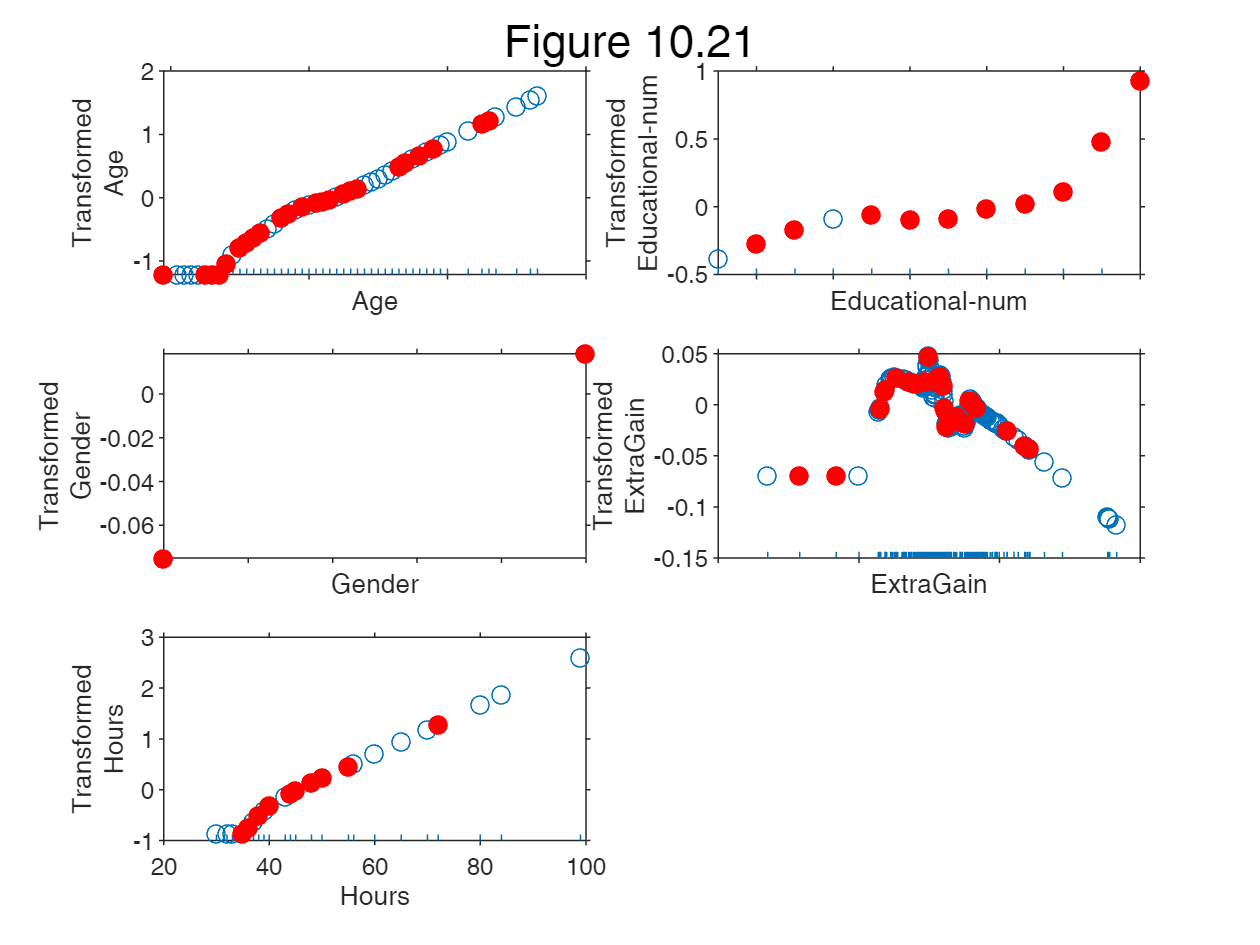

In [64]:

pl_tX=findobj(0, 'type', 'figure','tag','pl_tX');
figure(pl_tX(end))
sgtitle('Figure 10.21')
set(gcf,'Name','Figure 10.21')

In [65]:
if prin==1
    % print to postscript
    print -depsc inc2f9aceploty.eps;
    print -depsc inc2f9aceplottX.eps;

end

## Create Table 10.4

In [66]:
format short
mdlAVAtra=fitlm(outrobAV.tX,outrobAV.ty,'Exclude',outrobAV.outliers);
disp('Table 10.4')

Table 10.4

In [67]:
disp(mdlAVAtra)

Linear regression model:
    y ~ 1 + x1 + x2 + x3 + x4 + x5
Estimated Coefficients:
                    Estimate         SE          tStat         pValue  
                   ___________    ________    ___________    __________
    (Intercept)    -2.8103e-16    0.046313    -6.0681e-15             1
    x1                 0.99871     0.07776         12.843    1.9213e-26
    x2                 0.91271     0.31232         2.9223     0.0039741
    x3                  1.3457      1.2601         1.0679       0.28715
    x4                     1.2       1.578        0.76046       0.44809
    x5                  1.0012    0.085572         11.701    2.8165e-23
Number of observations: 167, Error degrees of freedom: 161
Root Mean Squared Error: 0.598
R-squared: 0.655,  Adjusted R-Squared: 0.644
F-statistic vs. constant model: 61, p-value = 2e-35